In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# generazione di dati non lineari
# https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_non_linear_link.html


n_sample = 100
rng = np.random.RandomState(0)

# features data
data_max, data_min = 4, -4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)


# target data
noise = rng.randn(n_sample) * 13.3
target = data ** 3 -  data ** 2 - noise


# cerazioe di un dataframe 
df = pd.DataFrame({"input_feature": data, "target": target})


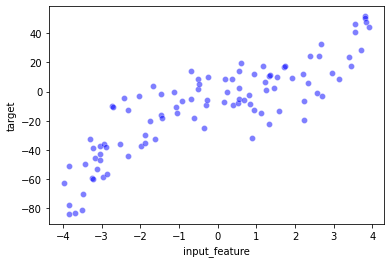

In [25]:
sns.scatterplot(data=df, x="input_feature", y="target", color="b", alpha=0.5)
plt.show()

In caso di relazione non lineare tra **feature** e **target**, abbiamo già visto che, creando artificialmente nuove feature da un polinomio di grado $n$ 
è possibile costruire un modello di apprendimento efficace.

Attraverso un polinomio è possibile approssimare la maggior parte delle funzioni continue, tuttavia con esponenti molto grandi, la complessità di calcolo tende ad aumentare molto velocemente. Inoltre stiamo alterando la composizione del dataset ma il modello resta ancora lineare.

Esiste un modo per costruire un modello più complesso, in grado di apprendere direttamente una relazione non lineare e più? La risposta porta direttamente alle reti neurali. 

# **Reti neurali artificiali**

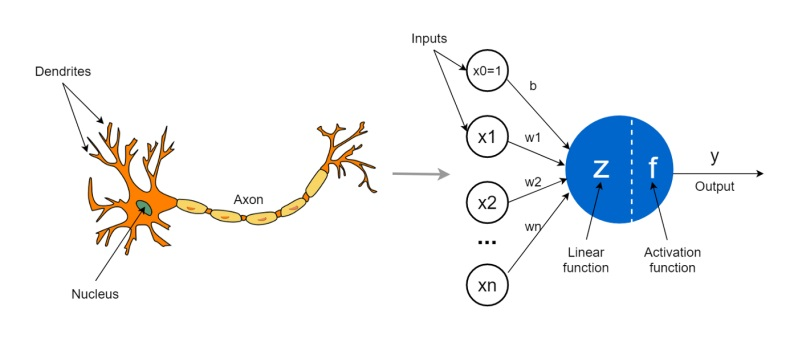

Partiamo dall'osservazione di un neurone biologico, le sue parti sono:
- **dentriti**: sono i punti di ingesso del neurone, da cui riceve impulsi elettrici dagli  altri neuroni collegati.
- **nucleo**: si occupa di generare una risposta dall'input dei dentriti, decidendo, in pratica, se attivare o meno il neurone.
- **terminali assonici**: trasmettono l'output al neurone successivo.

Cercando di ricostruire la stessa logia di funzionamento, i neuroni aritificiali si compongono di input, un nucleo di elaborazione e de dei terminali di output.

Nello specifico: il nucleo, genera un aouput a partire dall somma pesata delle feature più un eventuale termine di bias (nello stesso modo in cui processa i dati una regressione lineare multipla). Il risultato di questa operazione viene  poi passato ad una funzione che ha lo specifico compito di testarlo su un valore soglia. Se questo valore soglie viene superato, il neurone si attiva e passa il risultato al neurone successivo. 

Il calcolo generato da una concatenazione di neuroni genera la rete neurale.





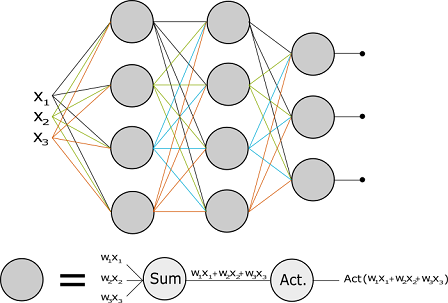

Una rete neurale si struttura su tre tiplogie di lvelli:

- **Input layer**: non esegue calcoli, si occupa di prendere i dati di ingresso per trasferirli alla rete
- **Hidden layers**: sono i livelli in cui avviene tutta l'elaborazione
- **Output layers**: sono i valori richiesti per la predizione o la distribuzione di probabilità per la classificazione.


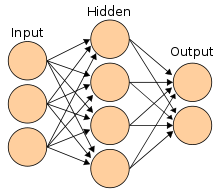

# **Costruire una rete neurale**

### **1. Somme pesate**

Come abbiamo già visto, una regressione lineare si compone sostanzialmente di una moltiplicazine di matrici coun una serie di paramatri.

Data una matrice $X$ le cui dimensioni sono determinate dal numero di colonne formate dalle feature e dal numero di righe, eseguiamo una **somma pesata** moltiplicando quesata matrice per una seconda matrice $W$ composta dai **pesi** e infine sommiamo tutto per un valore di bias $B$ .


\begin{align}
   WX + B = \sum_{i=1}^n w_ix_i + b = y
\end{align}

Potremmo definire questa **somma pesata** il primo pezzo di un singolo nucleo. Mentre, cotruire un livello composto da $n$ neuroni, vuol dire in pratica moltiplicare i valori di l'input per una serie di matrici di pesi diversi, in modo da apprendere differenti combinaziondi di caratteristiche. 

Detto altrimenti, per ogni livello nascosto di una rete neurale, ogni singolo neurone è determinato da una combinaziondi di **pesi** $w$ ed ha un proprio valore di output.

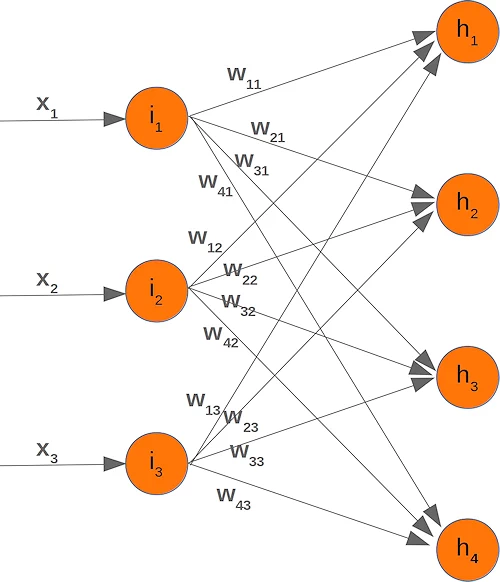

### **2. La funzione di attivazione**

La funzione di attivazione è una funzione matematica che prende il risultato di una somma pesata e le dà una forma non lineare. 

É in pratica il passaggio fondamentale per poter modellare qualsiasi tipo di funzione ed è anche il punto in cui un neurone decide se attivarsi o meno sulla base del risultato della funzione stessa.

La funzione di attivazione non è unica e la scelta dipende dal tipo di problema da risolvere.

Le più usate sono:
- la funzione sigmoide
- la funzione softmax
- la funzione relu


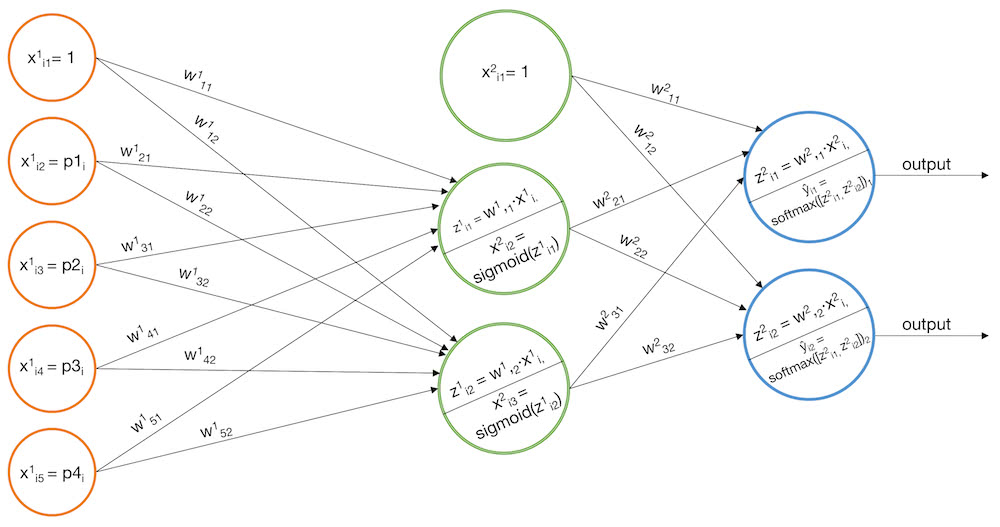

#### 2.1 **Funzione Sigmoide**

Già affrontata nella regressione logistica ed è, come ovvio, utilizzata nei problemi di classificazione. 

\begin{align}
   f(x) = \dfrac{1}{1 + e^{x}}
\end{align}

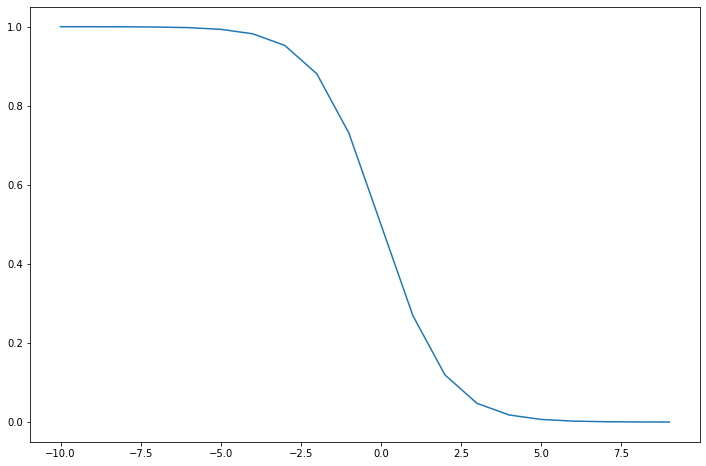

In [26]:
x = np.arange(-10, 10)
y = 1 / (1 + np.exp(x))

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

#### 2.1 **Funzione SoftMax**

Questa funzione viene utilizzata nei problemid di classificazione multipla. 
Il suo output è una distribuzione di probabilità i cui valori corrispondono alle categorie da classificare. 

Ad esempio: se sottoponiamo un'immagine ad un modello addestrato a classificare un certo numero di oggetti, questo restituirà un array di valori tra 0 e 1 assegnati ad ognuno di essi. 
Questi valori ci dicono in pratica che percentuale di riconoscimento è sata assegnata ad ognuno degli oggetti noti.

\begin{align}
   f(x_i) = \dfrac{e^{xi}}{\sum_{j=1}^ne^{xj}}
\end{align}

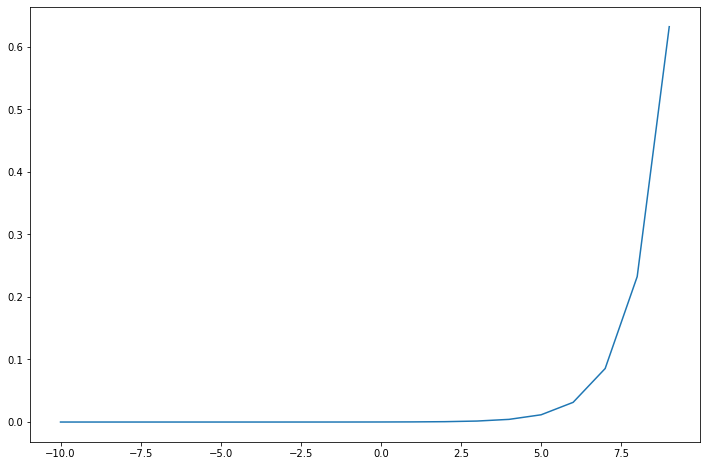

In [27]:
y = (np.exp(x)/np.exp(x).sum())

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

#### 2.1 **ReLu**

La funzione ***Rectified Linear Unit*** è la più semplice e rapida da calcolare.  Molto usata per i livelli nascosti nelle reti neurali più complesse. 



\begin{align}
   f(x) = max(0, x)
\end{align}

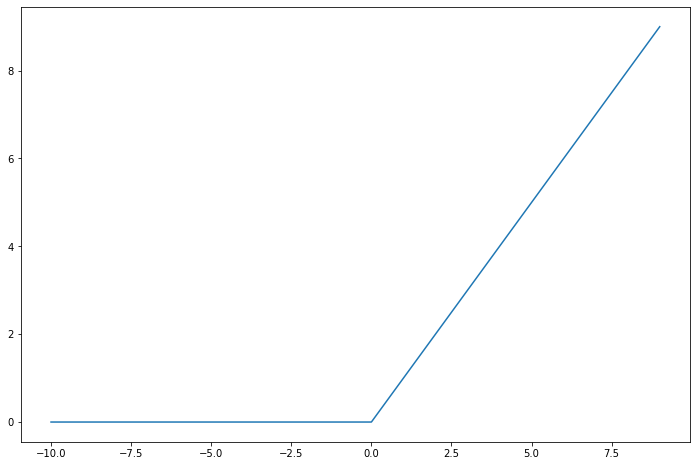

In [28]:
y = np.maximum(0, x)

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

# **Addestrare una rete neurale**

Sappiamo dal Machine Learning classico (in particolare quello supervizionato)che la fase di addestramento non è altro che un processo in cui il modello scelto minimizza ad ogni iterazione l'errore di predizione fino a raggiungere un livello di approsimazione ottimale. 

Una rete neurale non fa nulla di diverso ma su scala più ampia. Il processo iterativo viene sostiuito dal passagio tra i livelli nascosti di una rete neurale, all'interno dei quali i pesi vengono modificati fino ad arrivare al livello di approssimazione deisderato. 

L'intero processo di elaborazione necessario al completamento di tutti i passaggi utili a modificare i pesi, viene chiamato **epoca**.

Ogni epoca è caratterizzata dai due momenti che completano il ciclo:
- **forward-propagation:** l'insieme di processi visti fin'ora fino alla funzione di attivazione.
- **back-propagation:** l'applicazione della **discesa del gradiente** alla **funzione di costo** calcolata sulla composizione di funzioni che descrive l'intera fase di forward-propagation.

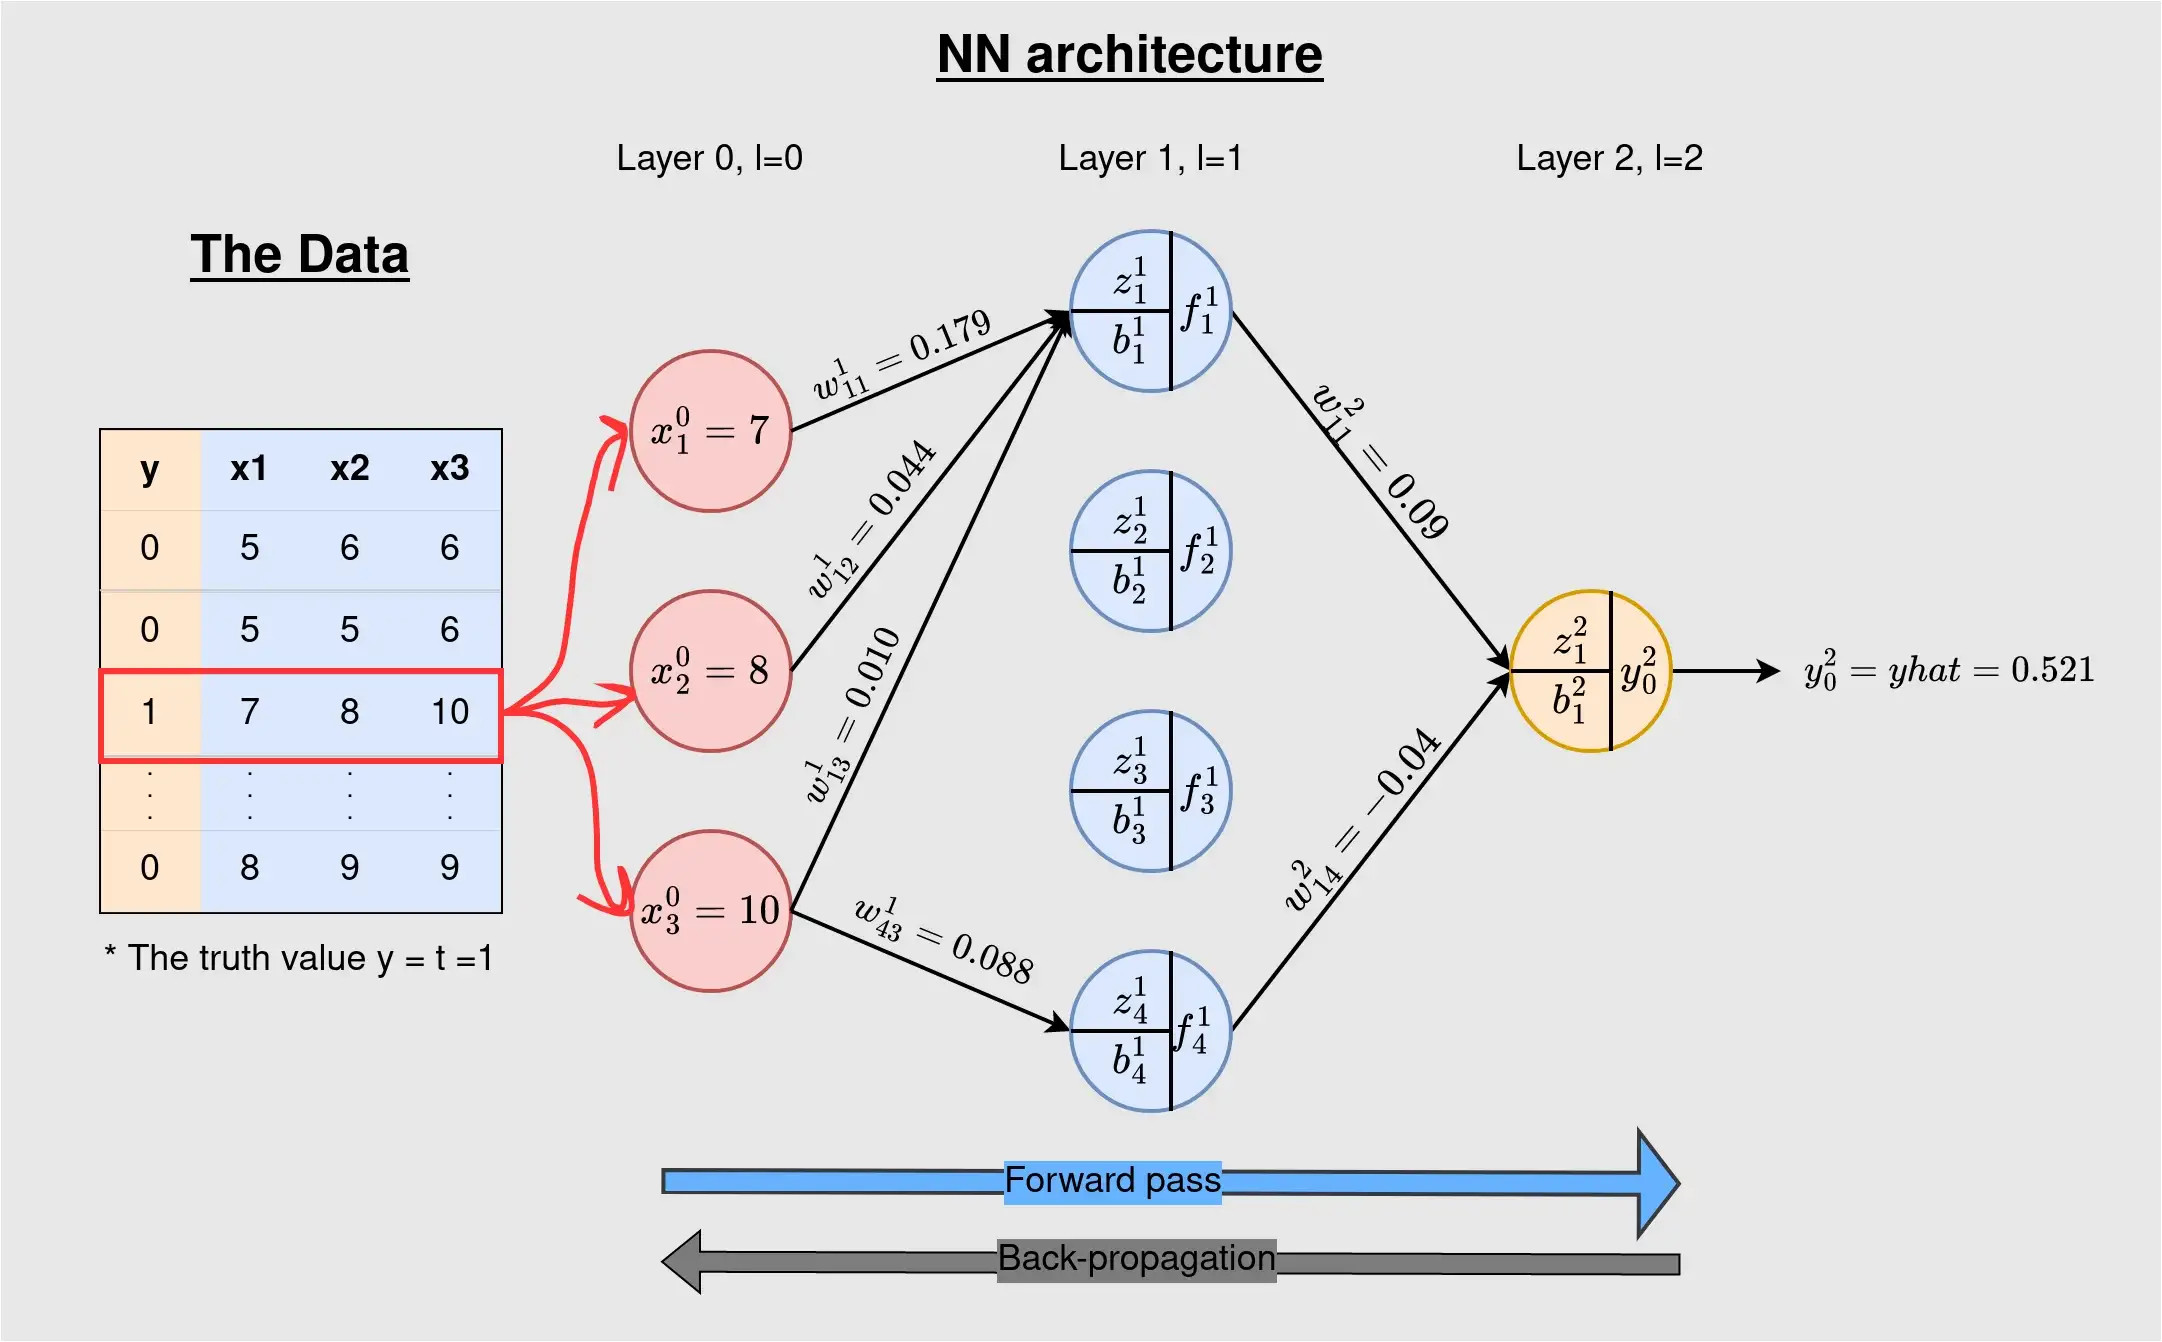

### 1. **back propagation**

Ricapitoliamo cosa avviene durante la ***forward-propagation:***
0. il livello di input si attiva scegliendo dei valori casuali per i pesi
1. ogni neurone effettual la somma pesate dei valori di input
2. apllica la funzione di attivazione
3. trasferisce il risultato al neurone del livello nascosto successivo
4. arrivati al livello di output si ottiene un valore di predizione.

Da qui in poi comincia il cammino a ritroso della **back-propagation**:
1. dalla differenza tra valore atteso e valore predetto si ottiene l'errore di predizione.
2. il valore dell'errore viene passato ad ogni neurone per per correggere i pesi nella forward-propagation
3. la discesa del gradiente viene utilizzata per determinare il valore con cui il peso deve essere modificato.


La back-propagation continua a modificare i parametri per ogni epoca, finchè non si arriva ad un livello di predizione accettabile per un certo numero di **epoche**.

Nel caso di problemi molto complessi, per addestrare una rete neurale possono essere necessarie anche migliaia di **epoche**.





#### 2. **Il Perceptron**

Si tratta di un singolo neurone che usa una funzione a gradino per la classificazione binaria. 
Il suo output in genere (dipende dall'implementazione) è 0 o 1.




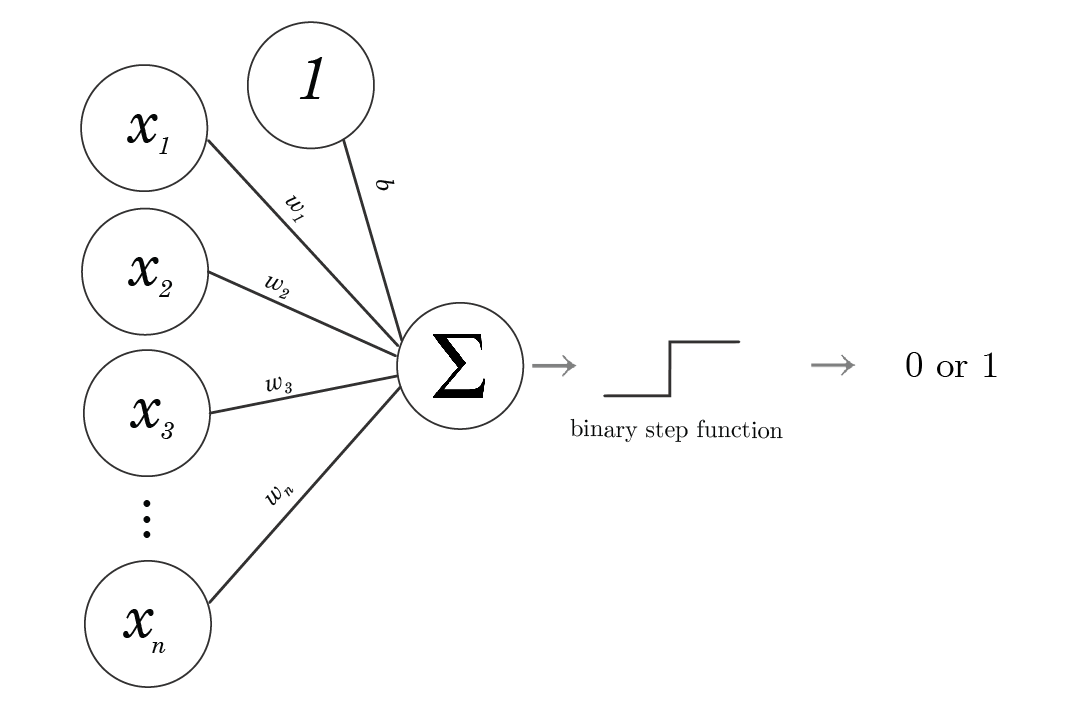

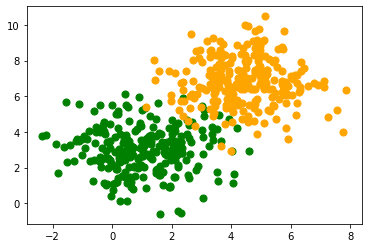

In [30]:
# esmpio tratto da:
# https://python-course.eu/machine-learning/perceptron-class-in-sklearn.php
from sklearn.datasets import make_blobs

n_samples = 500
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9]), 
                             cluster_std=1.3,
                             random_state=0)


colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

In [31]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [33]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# creazione del perceptron
p = Perceptron(random_state=42)

p.fit(train_data, train_labels)

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)

train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.9275
score on test data:  0.9
